In [389]:
import numpy as np
import random as ran
import matplotlib.pyplot as pltl
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.metrics.pairwise import euclidean_distances

# 1) Create ToyModel: questa parte di codice non va più usata con la rete neurale (NN)

In [85]:
#************** CONSTANTS ***************
      
pi=np.pi
mass=0.0001 

#Definisce dei file con label 10,12,13,11. A fine del vecchio programma venivano salvati questi 4 file
#Noi siamo interessati al 10

#open(10,file='toymodel.dat',status='unknown')
#open(12,file='toymodel1-rand.dat',status='unknown')
#open(13,file='toymodel2-rand.dat',status='unknown')
#open(11,file='toymodel_prof.dat',status='unknown')

x8=1.000000000000
Np=500000
Ldisc=600.
print('Size  disk=%f' %Ldisc)

iota=0. 
print('iota=%f' %iota)

L1=1.5*Ldisc
L2=1.*Ldisc
L3=Ldisc/10.
print('L1,L2,L3=%f%f%f' %(L1,L2,L3))

#print('L1,L2,L3 [semi axis]=',L1,L2,L3) #---> non capisco
      
print('Np= %i' %Np)
      
      
#*************************************************
x=np.zeros((Np))
y=np.zeros((Np))
z=np.zeros((Np))
r=np.zeros((Np))
vxRd=np.zeros((Np))
vyRd=np.zeros((Np))
vzRd=np.zeros((Np))
vxRt=np.zeros((Np))
vyRt=np.zeros((Np))
vzRt=np.zeros((Np))
vx=np.zeros((Np))
vy=np.zeros((Np))
vz=np.zeros((Np))
vtot = np.zeros((Np))

x[0]=0.
y[0]=0.
z[0]=0.
       
#**************** disk ***************************

#j=0                                                 A COSA SERVE QUESTO j?

#Per ogni punto
for i in range(1,Np):
    
    #x1, y1 e z1 devono rispettare delle condizioni; creo un ciclo while che si ferma quando vengono rispettate
    #Per entrare nel while setto le 3 variabili (ed r2) in modo tale da entrare nel ciclo
    x1 = L1 + 1
    y1 = L2 + 1
    z1 = L3 + 1
    r2 = 2.
    
    while(((x1 < -L1) or (x1 > L1)) and ((y1 < -L2) or (y1 > L2)) and ((z1 < -L3) or (z1 > L3)) and (r2 > 1)):
        x1=2.*L1*(ran.uniform(0,1)-0.5)
        y1=2.*L2*(ran.uniform(0,1)-0.5)
        z1=2.*L3*(ran.uniform(0,1)-0.5)
        #Non inserisco rz perché non serve per rispettare le 4 condizioni 
        rx=x1-x[0]
        ry=y1-y[0]

        r2 = np.sqrt(rx*rx/(L1)**2.+ry*ry/(L2)**2)

    #Uscito dal while faccio tutte le assegnazioni
    x[i]=x1
    y[i]=y1
    z[i]=z1
    
    rx=x[i]-x[0]
    ry=y[i]-y[0]
    rz=z[i]-z[0]
    
    r[i] = np.sqrt(rx*rx+ry*ry+rz*rz)
    alpha = 180./pi*np.arctan(np.abs(ry)/np.abs(rx))
    
    
    if(r[i] <= 200):
        vradial = 0.
        vrotation = 100.

    else: #---> PARTE DA MODIFICARE
        vradial = 0.4*r[i]
        vrotation = 000./(r[i]/200.)

    vxRd[i] = abs(vradial)*np.abs(rx)/r[i] #radial component 
    vyRd[i] = abs(vradial)*np.abs(ry)/r[i]
    vzRd[i] = abs(vradial)*np.abs(rz)/r[i]

    if(rx < 0):
        vxRd[i] = -vxRd[i]
    if(ry < 0):
        vyRd[i] = -vyRd[i]
    if(rz < 0):
        vzRd[i] = -vzRd[i]


#       vRad=sqrt(vxRd(i)*vxRd(i)+vyRd(i)*vyRd(i)+vzRd(i)*vzRd(i))


#       vxRt(i)=+(ry)*vrotation/r(i) !clockwise --> anticlockwise invert signs
#       vyRt(i)=-(rx)*vrotation/r(i)
#       vzRt(i)=0.

    vxRt[i] = -(ry)*vrotation/r[i] #anticlockwise --> clockwise invert signs
    vyRt[i] = +(rx)*vrotation/r[i]
    vzRt[i] = 0.

    vRot = np.sqrt(vxRt[i]*vxRt[i]+vyRt[i]*vyRt[i]+vzRt[i]*vzRt[i])

    vx[i] = vxRt[i]+vxRd[i]
    vy[i] = vyRt[i]+vyRd[i]
    vz[i] = vzRt[i]+vzRd[i]

    vtot[i] = np.sqrt((vx[i]**2.+(vy[i]**2.+(vz[i]**2.))))

    #write(10,*)x(i),y(i),z(i),vx(i),vy(i),vz(i),x8 ---> Questo è il file che poi, prima di questo codice,
                                                        #assegnavamo al codice python che proietta sulla
                                                        #linea di vista

Size  disk=600.000000
iota=0.000000
L1,L2,L3=900.000000600.00000060.000000
Np= 500000


# Al posto di 1): NN che genera vradiale (vR) e vcircolare (vT) + l'angolo j, tutti e 3 da dare in input alla Loss

In [330]:
#Vreal = np.loadtxt('M51_Things.txt')
Vreal = np.loadtxt('map_64.grid')

In [331]:
Vreal.shape

(3300, 4)

#### Bisogna provare NN che genera 3 output (2 vettori vR e vT ed 1 scalare che e' l'angolo J); oppure un unico output che e' un vettore che comprende vR, vT e J

In [332]:
Vreal_loss = Vreal[:,2]
Vreal_loss.shape

(3300,)

In [424]:
input_layer = keras.Input(shape=(Vreal_loss.shape[0], ))
layer_1 = keras.layers.Dense(Vreal_loss.shape[0], activation="relu")(input_layer)
#layer_2 = keras.layers.Dropout(.2, input_shape=(Vreal_loss.shape[0],))(layer_1)
#layer_3 = keras.layers.Dense(Vreal.shape[0], activation="relu")(layer_1)
#layer_4 = keras.layers.Dense(Vreal.shape[0], activation="relu")(layer_1)

# Se output unico
output_layer = keras.layers.Dense(Vreal_loss.shape[0]*2+1, activation="relu")(layer_1)
#output_layer = keras.layers.Dense(Vreal_loss.shape[0], activation="sigmoid")(layer_1)
model = keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

# Se output multiplo
#output_layer1 = keras.layers.Dense(Vreal.shape[0], activation="sigmoid")(encoder_layer_4)
#output_layer2 = keras.layers.Dense(Vreal.shape[0], activation="sigmoid")(encoder_layer_4)
#output_layer3 = keras.layers.Dense(1, activation="sigmoid")(encoder_layer_4)
#model = keras.Model(inputs=input_layer, outputs=(output_layer1,output_layer2,output_layer3))

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 3300)]            0         
_________________________________________________________________
dense_60 (Dense)             (None, 3300)              10893300  
_________________________________________________________________
dense_61 (Dense)             (None, 6601)              21789901  
Total params: 32,683,201
Trainable params: 32,683,201
Non-trainable params: 0
_________________________________________________________________


# 2) Custom Loss Function ed ottimizzazione NN

In [425]:
#I = Iinput/180.*np.pi
#J = Jinput/180.*np.pi
#Vloss = vT*np.sin(I)*np.cos(J)+vR*(np.sin(I)*np.sin(J))

#### Custom Loss Function: we want to minimize the Residual between the Vloss_real and Vloss_predict

In [426]:
#from sklearn.metrics.pairwise import euclidean_distances
Iinput = 20
def custom_loss_function(y_true,y_pred):
    y_pred = tf.reshape(y_pred, [y_pred.shape[1],])
    y_true = tf.reshape(y_true, [y_true.shape[1],])
    I = Iinput/180.*np.pi
    J = y_pred[y_pred.shape[0]-1]/180.*np.pi
    #Vloss = vT*np.sin(I)*np.cos(J)+vR*(np.sin(I)*np.sin(J)) with vR = v radial
    Vloss = (y_pred[0:int((y_pred.shape[0]-1)/2)]*np.sin(I)*tf.math.cos(J) + 
             y_pred[int((y_pred.shape[0]-1)/2):int((y_pred.shape[0]-1))]*(np.sin(I)*tf.math.sin(J)))
    R = y_true - Vloss
    return tf.math.reduce_sum(abs(R))

In [427]:
# Optimizer,loss, metrics and compile the model
# learning rate
LR_ST=1e-3
# Optimizer:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=LR_ST)
# Loss function:
#LOSS = tf.keras.losses.CosineSimilarity()
LOSS = custom_loss_function
METRIC = custom_loss_function#[tf.keras.metrics.MeanAbsoluteError()]
# Model
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRIC)

In [431]:
model.fit(Vreal_loss.reshape((1,Vreal_loss.shape[0])),Vreal_loss.reshape((1,Vreal_loss.shape[0])), epochs=100)#, batch_size=1234, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 71ms/step - loss: 56972.7031 - custom_loss_function: 56972.7031
Epoch 2/100
1/1 [==============================] - 0s 77ms/step - loss: 56432.4180 - custom_loss_function: 56432.4180
Epoch 3/100
1/1 [==============================] - 0s 71ms/step - loss: 56880.7227 - custom_loss_function: 56880.7227
Epoch 4/100
1/1 [==============================] - 0s 73ms/step - loss: 57305.6445 - custom_loss_function: 57305.6445
Epoch 5/100
1/1 [==============================] - 0s 75ms/step - loss: 56632.5820 - custom_loss_function: 56632.5820
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 56426.6016 - custom_loss_function: 56426.6016
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 56440.4844 - custom_loss_function: 56440.4844
Epoch 8/100
1/1 [==============================] - 0s 75ms/step - loss: 56735.1016 - custom_loss_function: 56735.1016
Epoch 9/100
1/1 [==============================] - 0s 75

1/1 [==============================] - 0s 76ms/step - loss: 56359.9844 - custom_loss_function: 56359.9844
Epoch 70/100
1/1 [==============================] - 0s 73ms/step - loss: 56291.8047 - custom_loss_function: 56291.8047
Epoch 71/100
1/1 [==============================] - 0s 74ms/step - loss: 55870.1289 - custom_loss_function: 55870.1289
Epoch 72/100
1/1 [==============================] - 0s 70ms/step - loss: 56149.6680 - custom_loss_function: 56149.6680
Epoch 73/100
1/1 [==============================] - 0s 74ms/step - loss: 56227.9492 - custom_loss_function: 56227.9492
Epoch 74/100
1/1 [==============================] - 0s 72ms/step - loss: 55822.8047 - custom_loss_function: 55822.8047
Epoch 75/100
1/1 [==============================] - 0s 69ms/step - loss: 56016.4766 - custom_loss_function: 56016.4766
Epoch 76/100
1/1 [==============================] - 0s 72ms/step - loss: 56365.5625 - custom_loss_function: 56365.5625
Epoch 77/100
1/1 [==============================] - 0s 73ms/s

In [400]:
predictions = model.predict(Vreal_loss.reshape((1,Vreal_loss.shape[0])))
predictions.shape

#### Calculate the quantities involved

In [477]:
vT = predictions[0,0:int((predictions.shape[1]-1)/2)]
vR = predictions[0,int((predictions.shape[1]-1)/2):int(predictions.shape[1]-1)]
J = predictions[0,predictions.shape[1]-1]
vT.shape, vR.shape, J, Vreal_loss.shape
Vlos = vT*np.sin(I)*np.cos(J)+vR*(np.sin(I)*np.sin(J))

# Maps comparison

In [478]:
from scipy.interpolate import griddata

<function matplotlib.pyplot.show>

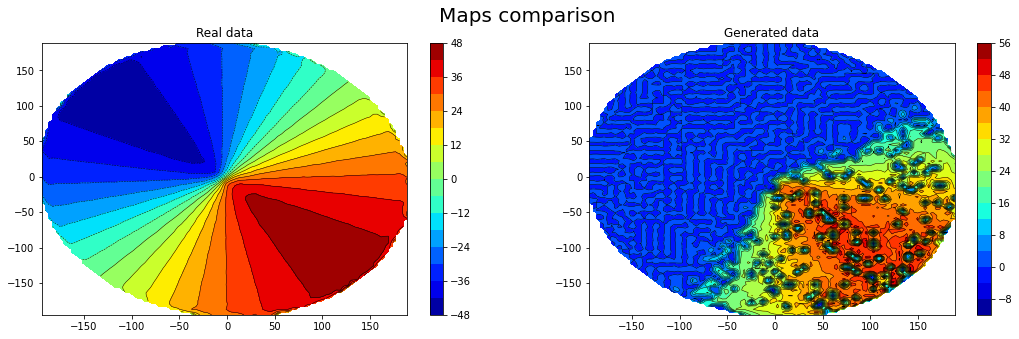

In [512]:
plt.figure(figsize=(18,5))
plt.suptitle('Maps comparison',fontsize=20)

#REAL MAP
plt.subplot(1, 2, 1)
plt.title('Real data')

X = Vreal[:,0]
Y = Vreal[:,1]
Z = Vreal[:,2]

# define grid.
xi = np.linspace(np.amin(X),np.amax(X),100)
yi = np.linspace(np.amin(Y),np.amax(Y),100)
# grid the data.
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar

# GENERATED MAP
plt.subplot(1, 2, 2)
plt.title('Generated data')


#X = Vreal[:,0]
#Y = Vreal[:,1]
Z = Vlos

# define grid.
xi = np.linspace(np.amin(X),np.amax(X),100)
yi = np.linspace(np.amin(Y),np.amax(Y),100)
# grid the data.
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
plt.show